In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

IMG_SIZE = 28
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'Alphabets',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'Alphabets',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation'
)

print('Class indices:', train_gen.class_indices)

Found 20800 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.
Class indices: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_gen, validation_data=val_gen, epochs=10)
model.save('cnn_char.h5')
print('Model saved as char_cnn.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

/Users/nguyenduchuy/CodeHTTM/XLA/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7989 - loss: 0.6613 - val_accuracy: 0.8752 - val_loss: 0.3563
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9188 - loss: 0.2410 - val_accuracy: 0.9017 - val_loss: 0.2531
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9356 - loss: 0.1799 - val_accuracy: 0.9081 - val_loss: 0.2260
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9448 - loss: 0.1446 - val_accuracy: 0.9200 - val_loss: 0.2096
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9546 - loss: 0.1213 - val_accuracy: 0.9175 - val_loss: 0.2235
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9579 - loss: 0.1030 - val_accuracy: 0.9244 - val_loss: 0.1891
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9631 - loss: 0.0912 - val_accuracy: 0.9179 - val_loss: 0.2099
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9674 - loss: 0.0807 - val_accuracy: 0.

Model saved as char_cnn.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


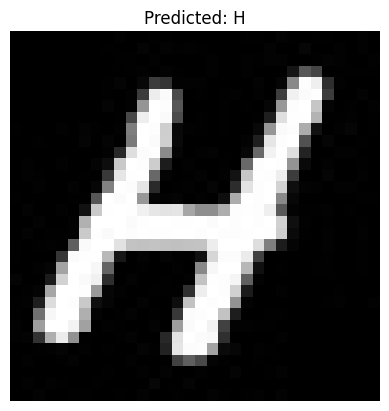

Image: Alphabets/H/1563.jpg
Prediction vector: [[1.0795940e-06 7.4077716e-11 7.7679299e-18 1.2101564e-13 2.7309250e-16
  5.4091620e-10 1.5837373e-12 9.9997938e-01 2.6773552e-11 6.6307498e-12
  1.9281952e-05 1.0582810e-09 6.2416045e-13 4.6962146e-08 2.6678728e-19
  1.8602027e-12 2.9823610e-10 1.7359125e-11 2.0128454e-07 3.1587349e-15
  4.0289513e-10 1.8652214e-10 4.7174535e-09 8.7859053e-09 1.3013170e-07
  3.9413517e-14]]
Predicted class: H
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


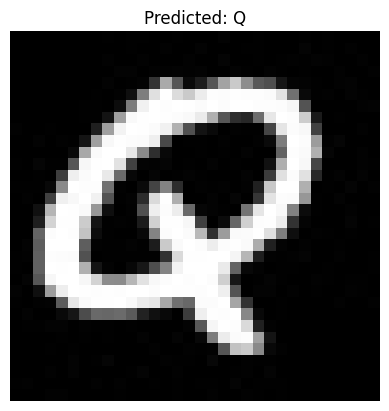

Image: Alphabets/Q/1871.jpg
Prediction vector: [[1.2590910e-12 1.5286793e-11 2.5026195e-10 4.9436696e-12 1.2002494e-15
  1.2162160e-13 1.3137736e-07 8.9673086e-20 5.7746708e-14 1.0902317e-17
  1.1764267e-18 1.3548906e-18 6.8869745e-19 6.6709998e-15 6.4618287e-13
  1.3616566e-12 9.9999988e-01 3.5562560e-09 3.1679895e-11 5.7136584e-21
  5.1233669e-15 4.7698496e-19 4.9158018e-11 5.0179768e-20 5.1123484e-18
  1.3234272e-13]]
Predicted class: Q
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


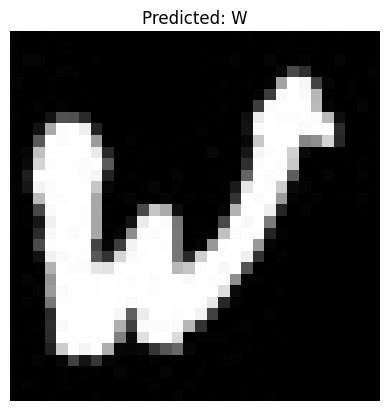

Image: Alphabets/W/1668.jpg
Prediction vector: [[2.8091901e-17 9.8861999e-13 1.5117160e-15 5.7367311e-09 9.2229946e-19
  2.9081412e-18 3.9318215e-13 6.7390982e-11 3.7364559e-11 5.5545507e-12
  3.5064881e-15 1.5546415e-12 8.2849081e-13 6.5138200e-10 8.0635351e-15
  4.4307169e-14 4.4245315e-12 7.4528107e-20 3.9768032e-13 1.4092233e-17
  5.9148711e-06 3.6706817e-05 9.9995732e-01 1.3171709e-13 5.3730176e-12
  2.1733612e-15]]
Predicted class: W
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


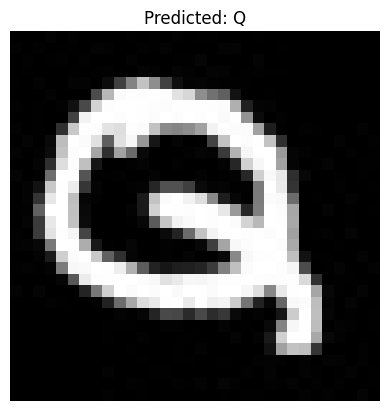

Image: Alphabets/Q/17.jpg
Prediction vector: [[9.8370174e-09 7.7802815e-07 1.9159434e-09 5.2024424e-10 1.2708637e-10
  1.2919686e-09 3.8710933e-02 5.6919058e-16 2.0427476e-15 8.5580265e-14
  4.6984200e-17 4.7059335e-18 6.8823476e-16 8.9564263e-18 2.1395542e-06
  2.9017689e-11 9.5973861e-01 1.6036800e-11 1.5474394e-03 1.1581829e-22
  3.3341995e-15 1.9091856e-22 6.0970729e-16 7.3461967e-25 3.8909156e-14
  1.2189106e-15]]
Predicted class: Q
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


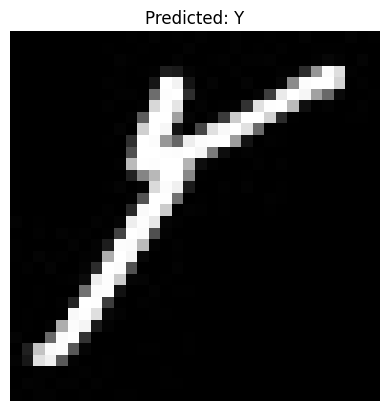

Image: Alphabets/Y/1300.jpg
Prediction vector: [[4.0521813e-12 2.8821228e-11 2.8357869e-09 2.2968068e-08 1.2550158e-11
  2.8658278e-06 1.2500269e-12 1.8195214e-08 4.2303204e-06 8.7415559e-09
  3.2608631e-07 1.7552065e-06 4.0560940e-12 1.1740366e-06 1.8623021e-10
  1.6131470e-07 3.5322492e-10 1.7931245e-11 8.8698971e-07 4.1675306e-05
  9.1642305e-10 3.0075049e-05 1.0136220e-09 2.8112434e-05 9.9988556e-01
  3.1523925e-06]]
Predicted class: Y
--------


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

MODEL_PATH = "cnn_char.h5"
DATASET_DIR = "Alphabets"

# Load model
model = tf.keras.models.load_model(MODEL_PATH)

# Tạo danh sách class A–Z
class_names = [chr(ord('A') + i) for i in range(26)]

def get_random_image():
    # Random chọn folder class (A, B, C...)
    class_folder = random.choice(os.listdir(DATASET_DIR))
    folder_path = os.path.join(DATASET_DIR, class_folder)
    
    # Random ảnh trong folder đó
    img_name = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_name)
    
    return img_path

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize về 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Normalize
    img_norm = img_resized / 255.0
    img_norm = img_norm.reshape(1, 28, 28, 1)

    return img, img_norm


# ----------- TEST 5 RANDOM IMAGES -----------
for _ in range(5):
    img_path = get_random_image()

    raw_img, input_img = preprocess_image(img_path)
    pred = model.predict(input_img)
    class_id = np.argmax(pred)
    class_name = class_names[class_id]

    # Plot ảnh
    plt.imshow(raw_img, cmap="gray")
    plt.title(f"Predicted: {class_name}")
    plt.axis("off")
    plt.show()

    print("Image:", img_path)
    print("Prediction vector:", pred)
    print("Predicted class:", class_name)
    print("--------")
